In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [2]:
ad = pd.read_csv('advertising.csv')

In [3]:
ad.shape

(200, 4)

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


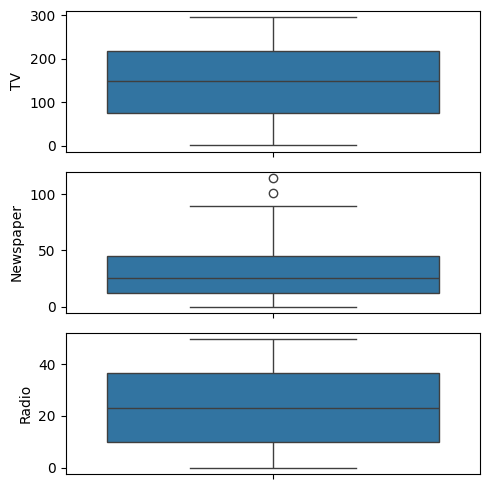

In [8]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ad['TV'], ax = axs[0])
plt2 = sns.boxplot(ad['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(ad['Radio'], ax = axs[2])
plt.tight_layout()

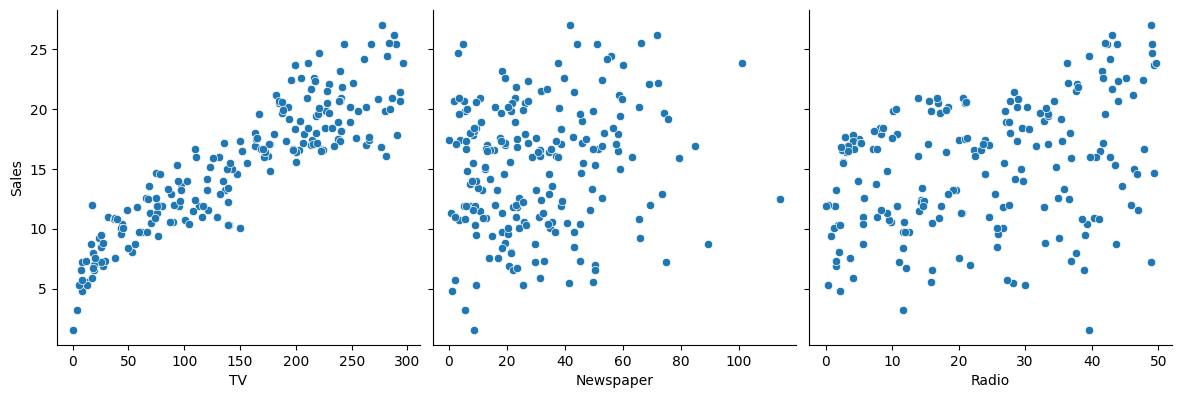

In [9]:
sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

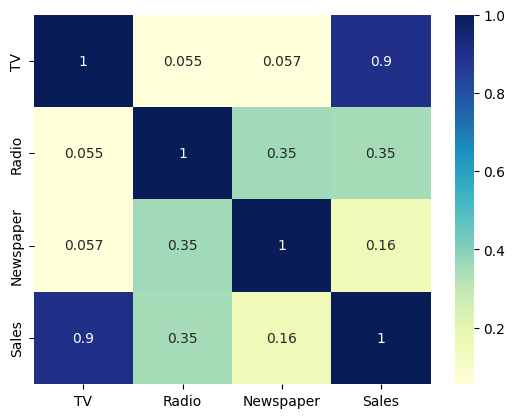

In [10]:
sns.heatmap(ad.corr(), cmap="YlGnBu", annot = True)
plt.show()

The above heat map shows that the TV variable has the most correlation with the Sales variable

In [16]:
X = ad['TV'].values.reshape(-1,1)
y = ad['Sales']

Splitting into Training and Testing Data

In [12]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

Model Fitting

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

R-Squared Value

In [20]:
reg.score(X,y)

0.8121757029987414

Coefficient and Intercept

In [21]:
print(reg.coef_)
print(reg.intercept_)

[0.05546477]
6.974821488229891


Plotting Actual vs Predicted Value

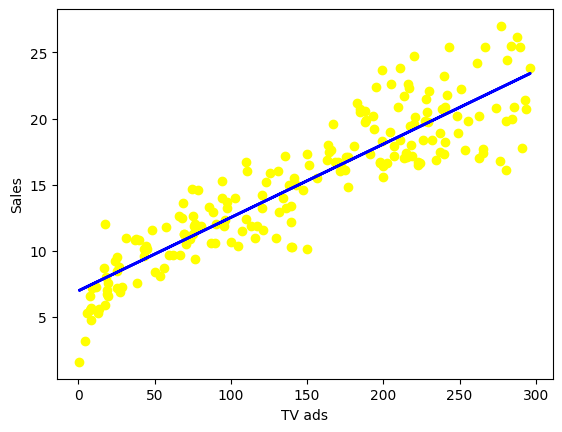

In [23]:
y_pred = reg.predict(X)
plt.figure()
plt.scatter(ad['TV'],ad['Sales'],c='yellow')
plt.plot(ad['TV'],y_pred,c='blue',linewidth=2)
plt.xlabel("TV ads")
plt.ylabel("Sales")
plt.show()

Statistical Model

In [24]:
import statsmodels.api as sm

In [25]:
X = ad['TV']
y = ad['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           7.93e-74
Time:                        16:50:48   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0